# Feature Engineering - 부동산 기본 특성(심승우)
        
### 수치형 변수:        
     - `LotFrontage`: 부동산과 연결된 도로 길이 (피트)
     - `LotArea`: 대지 크기 (평방 피트)
           
### 범주형 변수:      
    - `MSSubClass`: 건물 유형        
    - `MSZoning`: 일반적인 구역 분류        
    - `Street`: 도로 접근 유형        
    - `LotShape`: 대지의 일반적인 형태        
    - `LandContour`: 대지의 평탄도        
    - `Utilities`: 사용 가능한 유틸리티 종류        
    - `LotConfig`: 대지 구성        
    - `LandSlope`: 대지의 경사도        
    - `Neighborhood`: Ames 시 경계 내 물리적 위치        
    - `Condition1`: 주요 도로 또는 철도와의 인접성        
    - `Condition2`: 주요 도로 또는 철도와의 인접성 (두 번째가 있을 경우)

In [2]:
# 필요한 라이브러리 임포트

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
import sklearn
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import requests
from matplotlib import font_manager
import matplotlib.dates as mdates
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

# 나눔고딕 폰트 다운로드
url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
response = requests.get(url)

# 다운로드한 폰트를 파일로 저장
with open("NanumGothic.ttf", "wb") as f:
    f.write(response.content)

# 폰트 설치
font_manager.fontManager.addfont('NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 마이너스 기호 표기 가능하게 수정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 전처리된 훈련데이터 불러오기
train_data = pd.read_csv('processed_data.csv')
pd.set_option('display.max_columns', None)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [5]:
pd.set_option('display.max_rows', 20)

In [6]:
# 부동산 기본 특성 컬럼만 따로 모아보기
basic_cols = ['LotFrontage', 
              'LotArea', 
              'MSSubClass', 
              'MSZoning', 
              'Street', 
              'LotShape', 
              'LandContour', 
              'Utilities', 
              'LotConfig', 
              'LandSlope',
              'Neighborhood',
              'Condition1',
              'Condition2',
              'SalePrice']

In [7]:
train_data_basic = train_data[basic_cols]
train_data_basic.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,65.0,8450,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,208500
1,80.0,9600,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,181500
2,68.0,11250,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,223500
3,60.0,9550,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,140000
4,84.0,14260,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,250000


In [8]:
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   int64  
 2   MSSubClass    1422 non-null   int64  
 3   MSZoning      1422 non-null   object 
 4   Street        1422 non-null   object 
 5   LotShape      1422 non-null   object 
 6   LandContour   1422 non-null   object 
 7   Utilities     1422 non-null   object 
 8   LotConfig     1422 non-null   object 
 9   LandSlope     1422 non-null   object 
 10  Neighborhood  1422 non-null   object 
 11  Condition1    1422 non-null   object 
 12  Condition2    1422 non-null   object 
 13  SalePrice     1422 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 155.7+ KB


In [9]:
# MSSubClass는 단순 명목형 feature이므로 dtype을 object로 변경
train_data_basic['MSSubClass'] = train_data_basic['MSSubClass'].astype('object')
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   int64  
 2   MSSubClass    1422 non-null   object 
 3   MSZoning      1422 non-null   object 
 4   Street        1422 non-null   object 
 5   LotShape      1422 non-null   object 
 6   LandContour   1422 non-null   object 
 7   Utilities     1422 non-null   object 
 8   LotConfig     1422 non-null   object 
 9   LandSlope     1422 non-null   object 
 10  Neighborhood  1422 non-null   object 
 11  Condition1    1422 non-null   object 
 12  Condition2    1422 non-null   object 
 13  SalePrice     1422 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 155.7+ KB


In [10]:
train_data_basic.describe(include = 'all')

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
count,1422.000000,1422.000000,1422.0,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422.000000
unique,NaN,NaN,15.0,5,2,4,4,2,5,3,25,9,8,NaN
top,NaN,NaN,20.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,NaN
freq,NaN,NaN,520.0,1118,1416,892,1277,1421,1023,1345,215,1230,1407,NaN
mean,70.146723,10549.149789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182889.092124
std,22.260343,10097.991235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79414.407095
min,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34900.000000
25%,60.000000,7585.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131625.000000
50%,70.049958,9501.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165000.000000
75%,79.000000,11635.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000.000000


In [11]:
# 수치형과 범주형으로 컬럼을 3가지로 분류
basic_cols_num=['LotFrontage', 'LotArea', 'SalePrice']
basic_cols_cat=['MSSubClass', 
              'MSZoning', 
              'Street', 
              'Utilities', 
              'LotConfig', 
              'Neighborhood',
              'Condition1',
              'Condition2',
              'LotShape',
              'LandContour',
              'LandSlope']

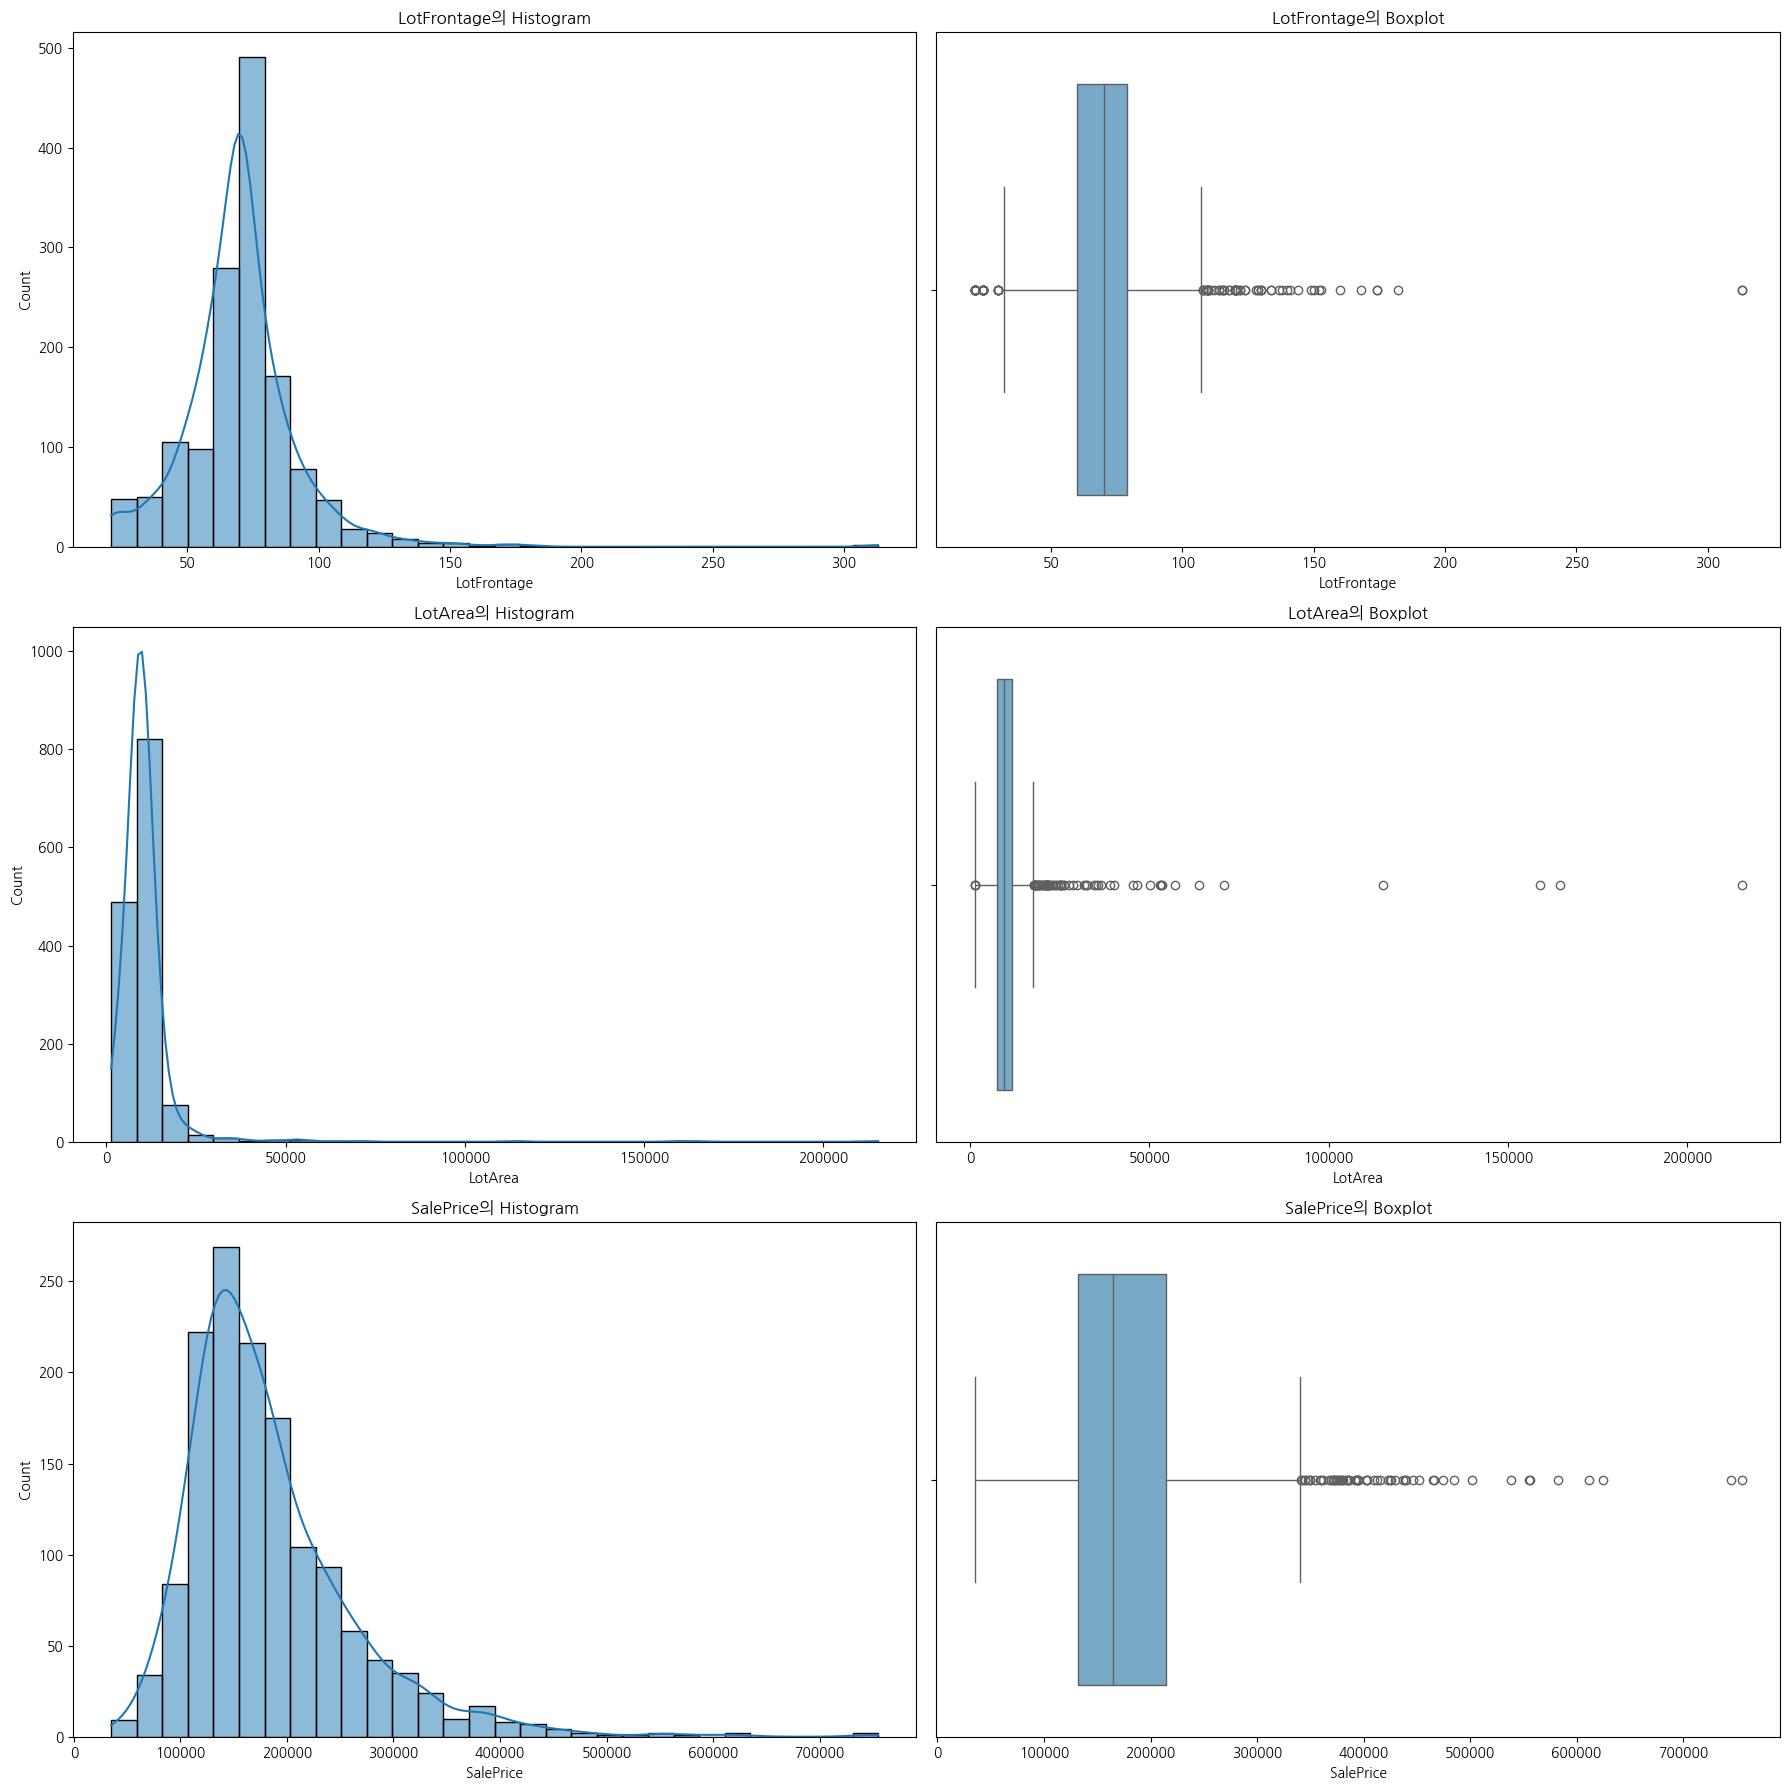

In [12]:
# 연속형 변수 분포 및 이상치 확인
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)  
sns.histplot(train_data_basic, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(3, 2, 2) 
sns.boxplot(data=train_data_basic, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(3, 2, 3) 
sns.histplot(train_data_basic, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(3, 2, 4) 
sns.boxplot(data=train_data_basic, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

plt.subplot(3, 2, 5) 
sns.histplot(train_data_basic, x='SalePrice', bins=30, kde=True, palette='Blues')
plt.title('SalePrice의 Histogram')

plt.subplot(3, 2, 6) 
sns.boxplot(data=train_data_basic, x='SalePrice', palette='Blues')
plt.title('SalePrice의 Boxplot')

# 그래프 출력
plt.tight_layout()
plt.show()

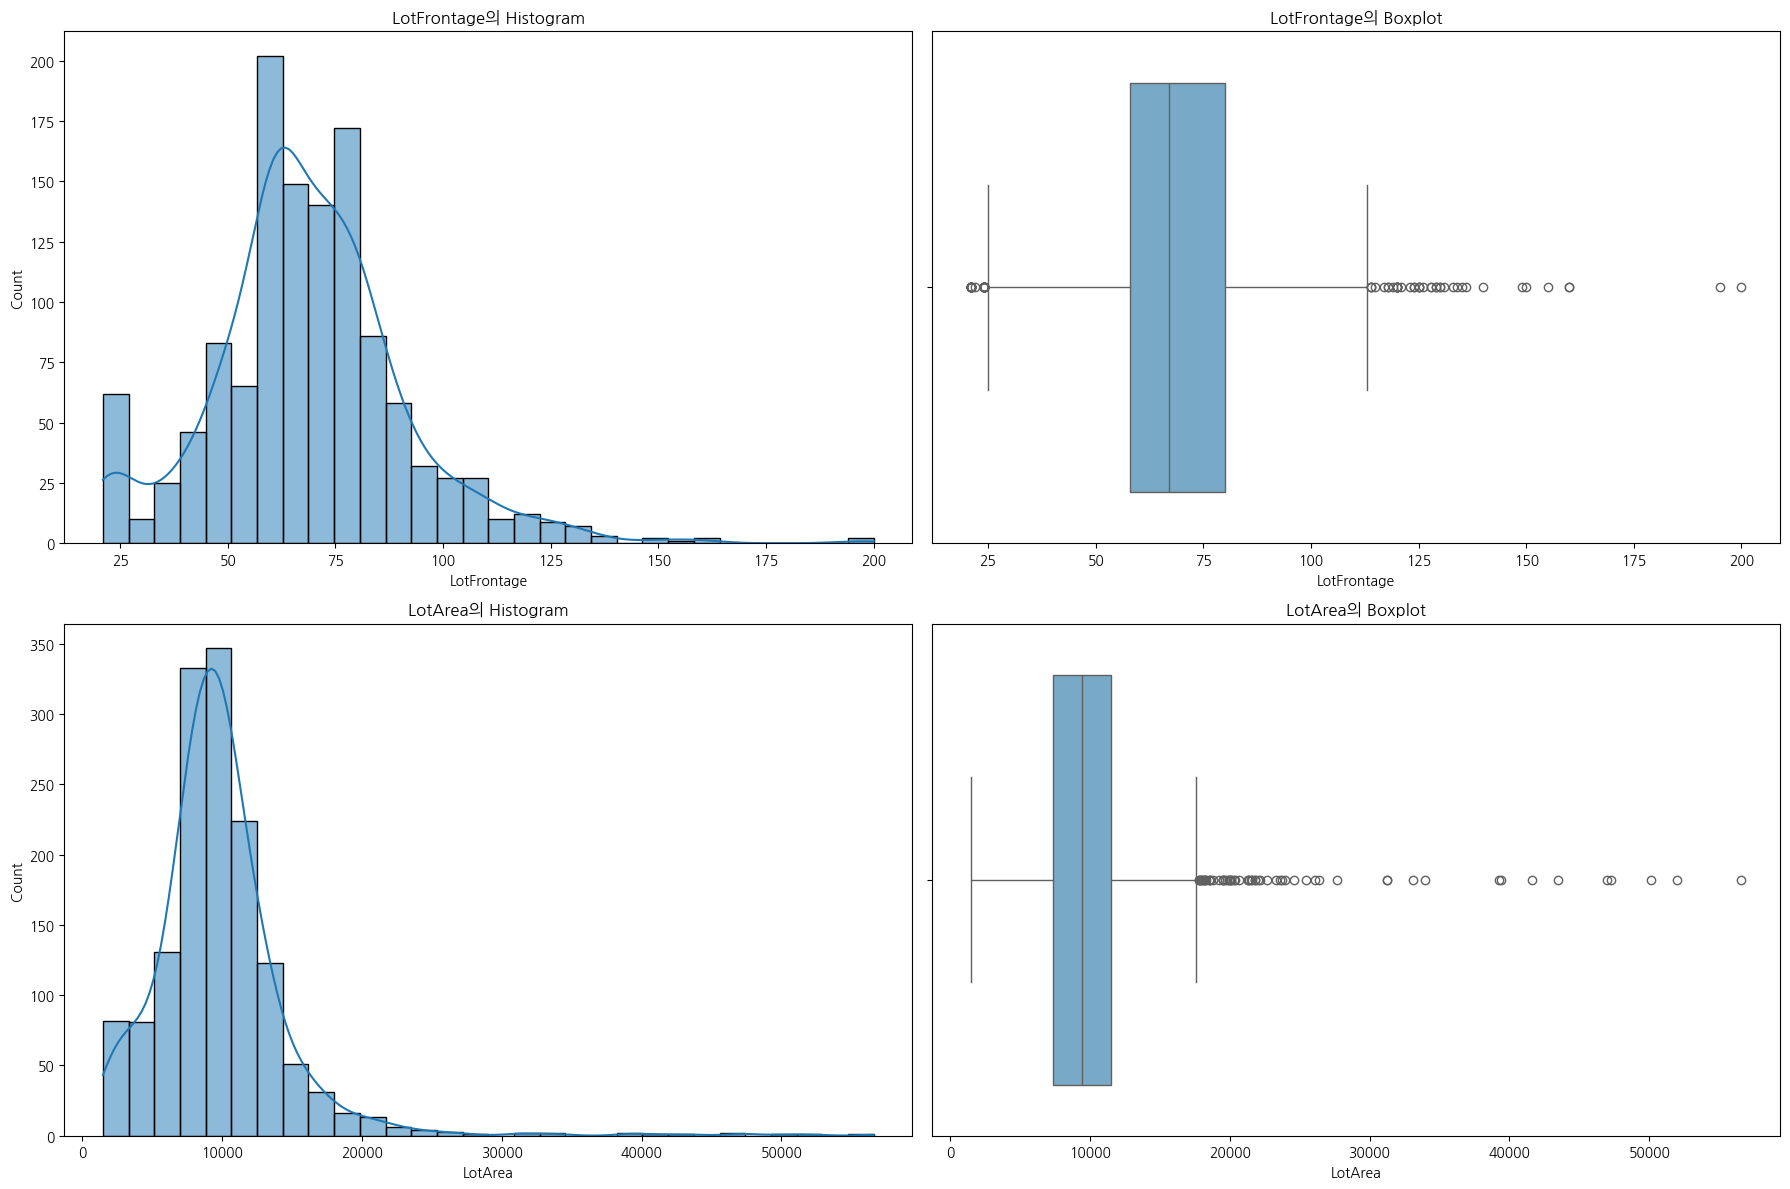

In [13]:
# test 데이터셋과 분포 비교
test_data = pd.read_csv('test.csv')

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)  
sns.histplot(test_data, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(2, 2, 2) 
sns.boxplot(data=test_data, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(2, 2, 3) 
sns.histplot(test_data, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(2, 2, 4) 
sns.boxplot(data=test_data, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

# 그래프 출력
plt.tight_layout()
plt.show()

기본적으로 train 데이터와 test 데이터 모두 세 피쳐 모두 꼬리가 모두 꼬리가 긴 형태의(왜도가 양수인) 분포가 나타나고 있어        
Boxplot 상의 모든 이상치를 삭제하는 것은 적절치 않아보임.     
다만 train 데이터셋이 상대적으로 더 꼬리가 길고 더욱 극단적인 수치가 일부 나타나고 있어,      
test 데이터 상의 최대값을 넘어가는 극단치들만 제거(대체)하는 것이 적절해보임.

In [15]:
# 이상치 평균치로 대체
train_data_basic['LotFrontage'].where(
    train_data_basic['LotFrontage'] < test_data['LotFrontage'].agg('max'), 
    other=test_data['LotFrontage'].agg('mean'), 
    inplace=True)

train_data_basic['LotArea'].where(
    train_data_basic['LotArea'] < test_data['LotArea'].agg('max'), 
    other=test_data['LotArea'].agg('mean'), 
    inplace=True)

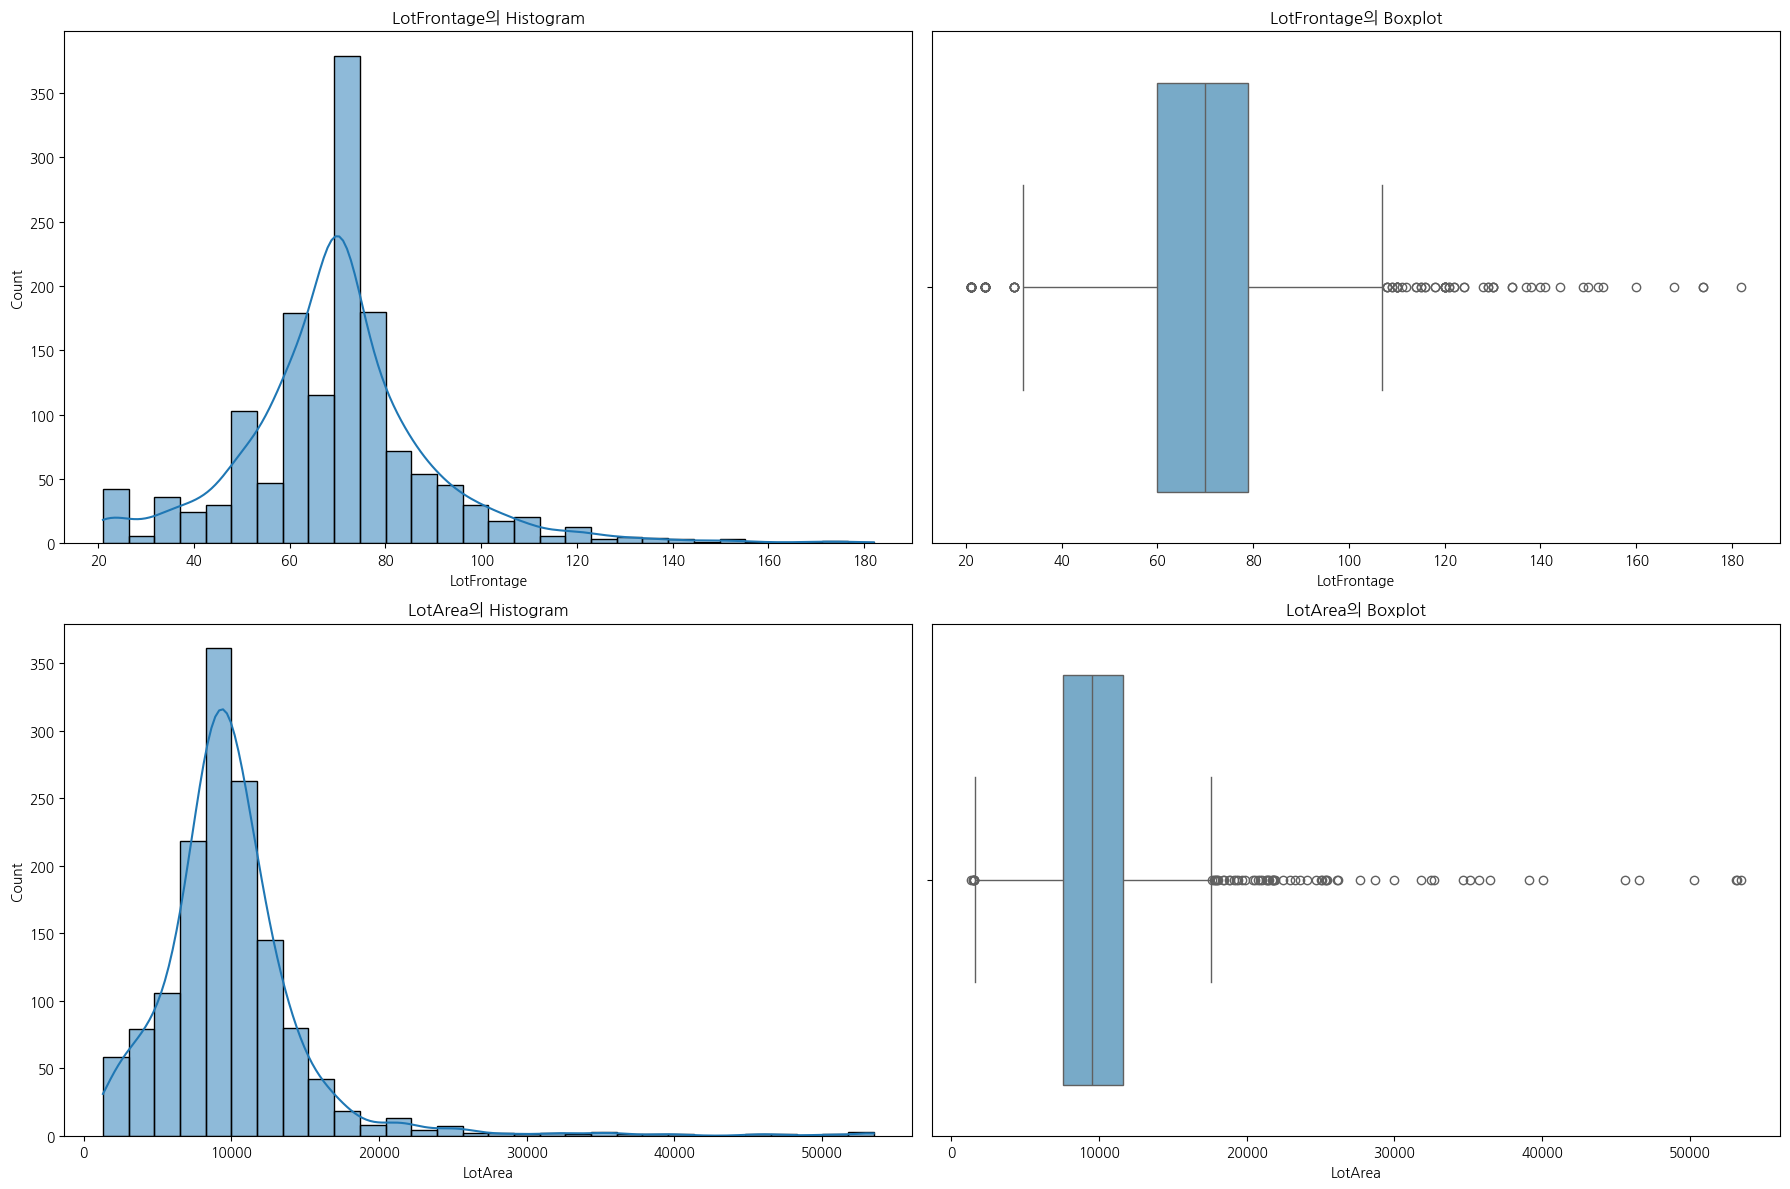

In [16]:
# 이상치 대체 이후 분포 재확인
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)  
sns.histplot(train_data_basic, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(2, 2, 2) 
sns.boxplot(data=train_data_basic, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(2, 2, 3) 
sns.histplot(train_data_basic, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(2, 2, 4) 
sns.boxplot(data=train_data_basic, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

plt.tight_layout()
plt.show()

test 데이터셋과 분포가 조금 더 비슷하게 맞춰진 것을 볼 수 있음.     

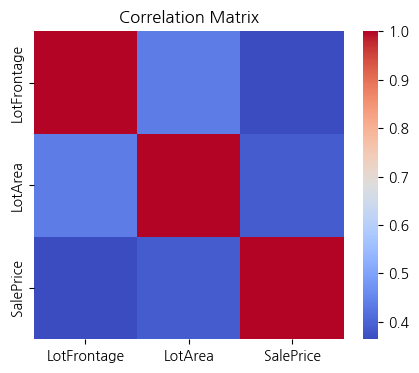


 #################### 상관관계 값 확인 ####################
             LotFrontage   LotArea  SalePrice
LotFrontage     1.000000  0.434636   0.363784
LotArea         0.434636  1.000000   0.387684
SalePrice       0.363784  0.387684   1.000000


In [18]:
# 수치형 변수의 상관관계 분석
corr_matrix = train_data_basic.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 상관관계 값 프린트
print('\n', '#'*20, '상관관계 값 확인', '#'*20)
print(corr_matrix)

SalePrice와 극단치 제거를 거친 나머지 두 피쳐 간의 상관계수는 0.3과 0.4 사이로 나타나 보통 수준의 양적 상관관계를 보임

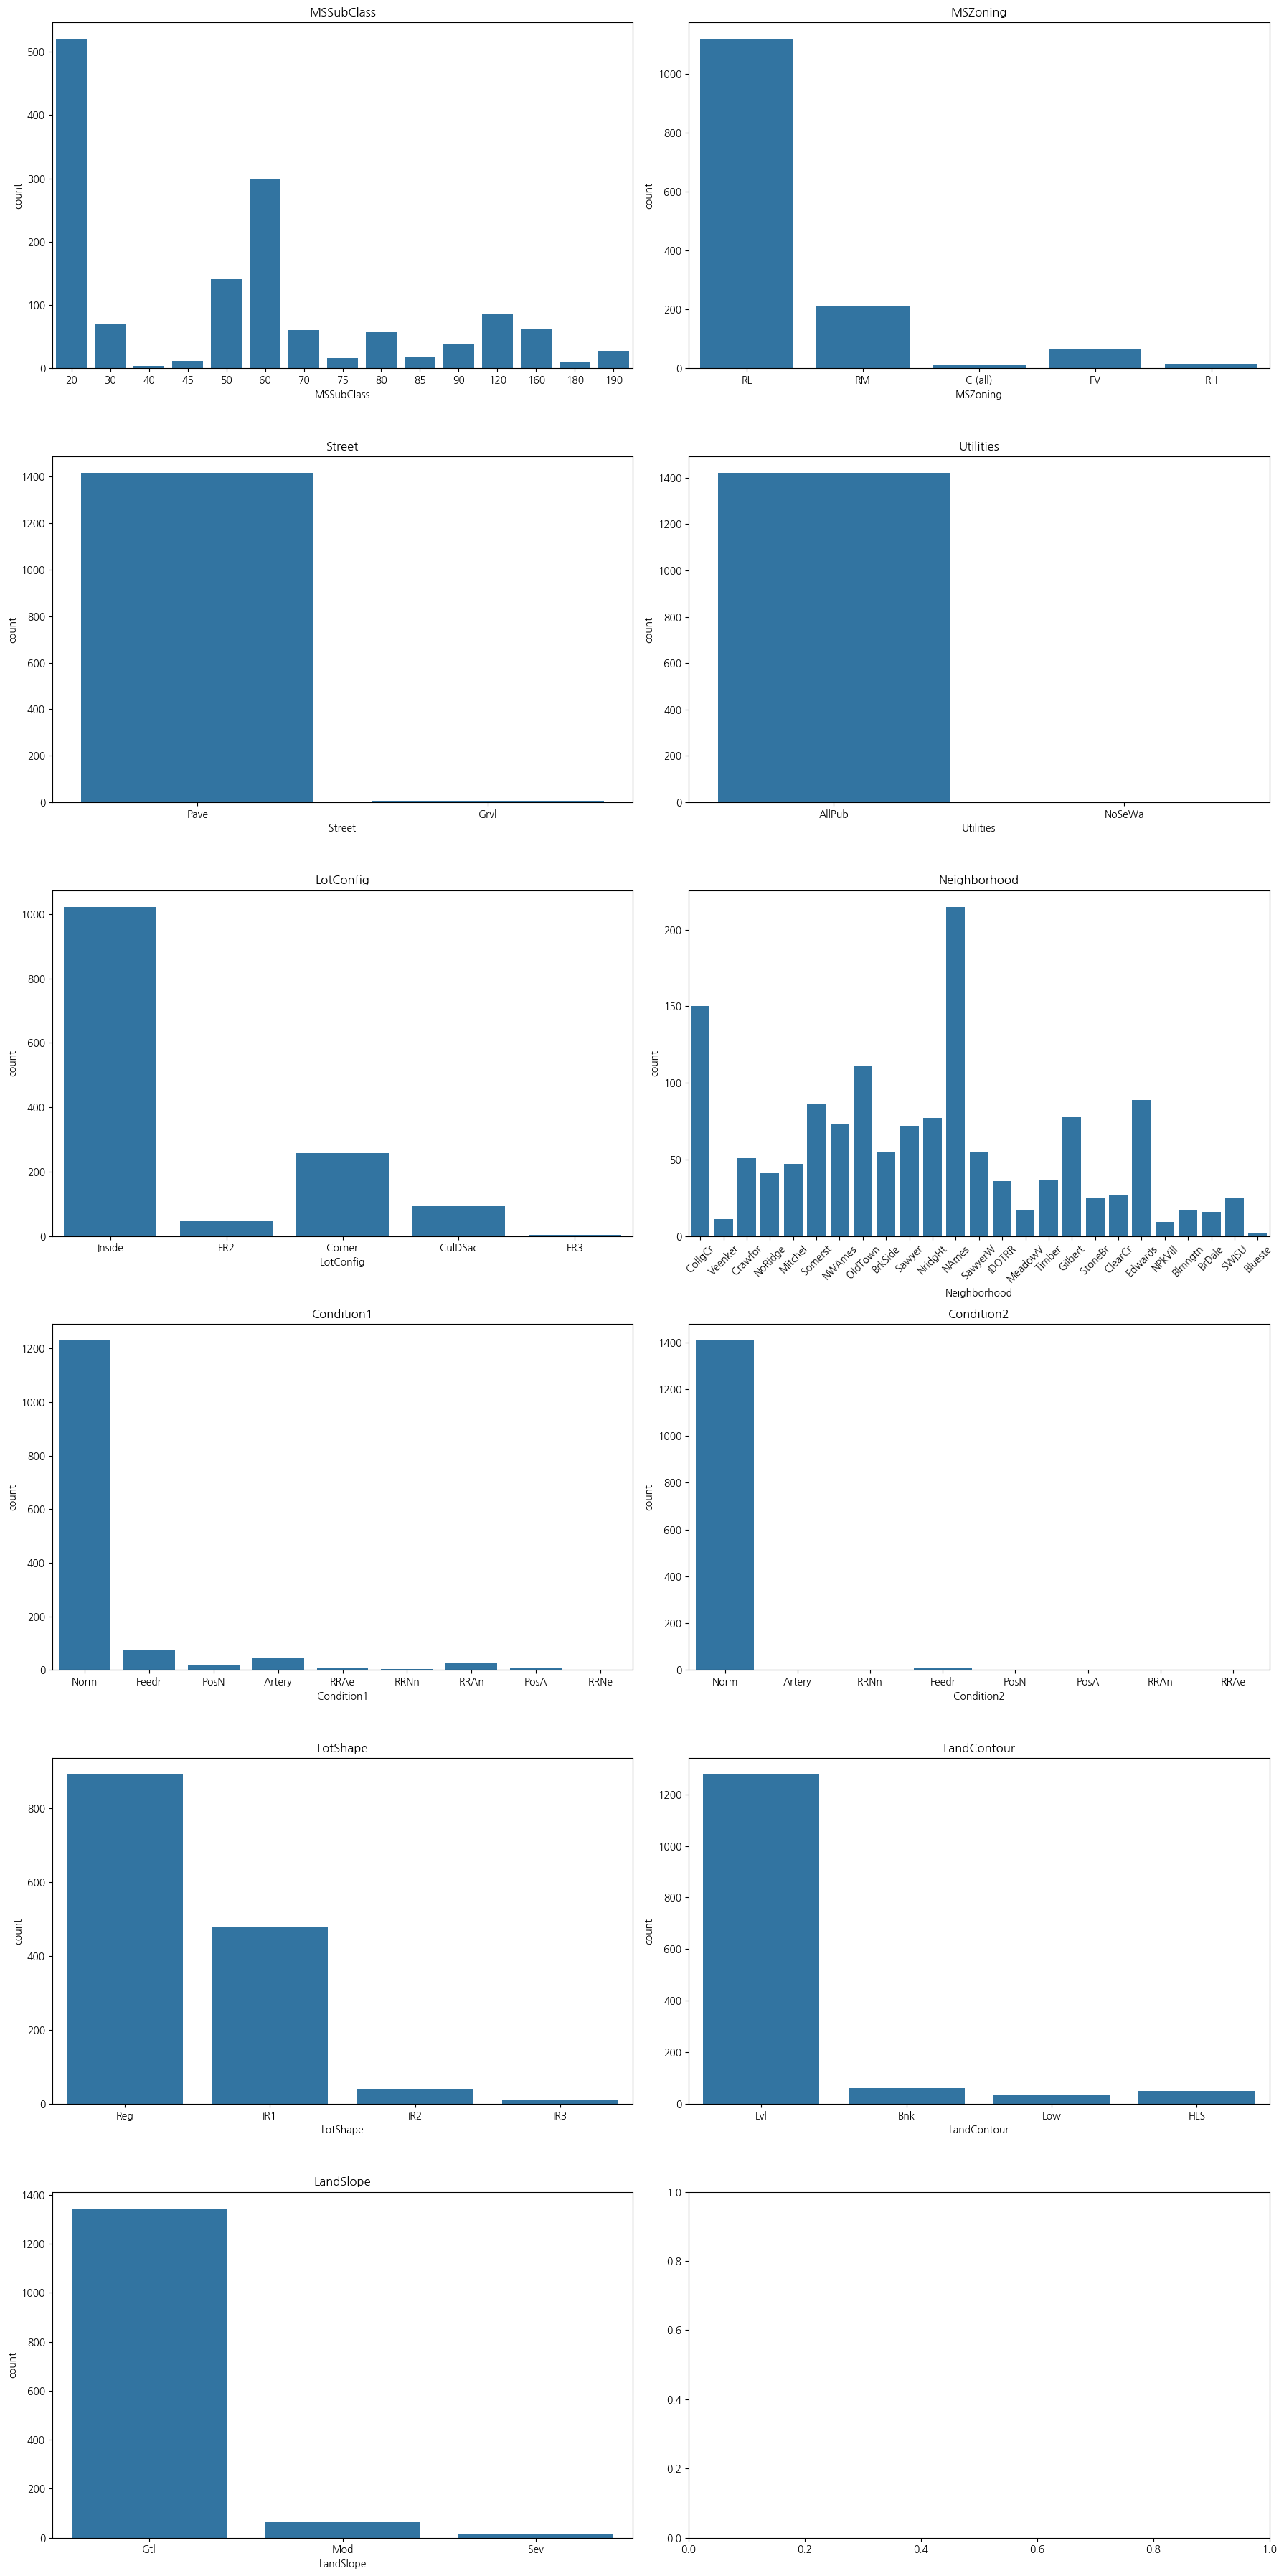

In [20]:
# 범주형 변수 분포 확인

fig, axes = plt.subplots(6, 2, figsize=(18,36))

sns.countplot(data=train_data_basic, x=basic_cols_cat[0], ax=axes[0, 0])
axes[0, 0].set_title(basic_cols_cat[0])
sns.countplot(data=train_data_basic, x=basic_cols_cat[1], ax=axes[0, 1])
axes[0, 1].set_title(basic_cols_cat[1])
sns.countplot(data=train_data_basic, x=basic_cols_cat[2], ax=axes[1, 0])
axes[1, 0].set_title(basic_cols_cat[2])
sns.countplot(data=train_data_basic, x=basic_cols_cat[3], ax=axes[1, 1])
axes[1, 1].set_title(basic_cols_cat[3])
sns.countplot(data=train_data_basic, x=basic_cols_cat[4], ax=axes[2, 0])
axes[2, 0].set_title(basic_cols_cat[4])
sns.countplot(data=train_data_basic, x=basic_cols_cat[5], ax=axes[2, 1])
axes[2, 1].set_title(basic_cols_cat[5])
axes[2, 1].tick_params(axis='x', rotation=45)  # 회전 적용
sns.countplot(data=train_data_basic, x=basic_cols_cat[6], ax=axes[3, 0])
axes[3, 0].set_title(basic_cols_cat[6])
sns.countplot(data=train_data_basic, x=basic_cols_cat[7], ax=axes[3, 1])
axes[3, 1].set_title(basic_cols_cat[7])
sns.countplot(data=train_data_basic, x=basic_cols_cat[8], ax=axes[4, 0])
axes[4, 0].set_title(basic_cols_cat[8])
sns.countplot(data=train_data_basic, x=basic_cols_cat[9], ax=axes[4, 1])
axes[4, 1].set_title(basic_cols_cat[9])
sns.countplot(data=train_data_basic, x=basic_cols_cat[10], ax=axes[5, 0])
axes[5, 0].set_title(basic_cols_cat[10])

plt.tight_layout()
plt.show()

'Street', 'Utilities', 'Condition2'는 value 간의 불균형이 지나치게 커 분석의 의미가 없을 것으로 보여 모델에서 삭제하겠음

In [22]:
# 훈련 데이터셋에서 'Street', 'Utilities', 'Condition2'컬럼 삭제
train_data_basic_cleaned = train_data_basic.drop(columns=['Street', 'Utilities', 'Condition2'])
train_data_basic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   float64
 2   MSSubClass    1422 non-null   object 
 3   MSZoning      1422 non-null   object 
 4   LotShape      1422 non-null   object 
 5   LandContour   1422 non-null   object 
 6   LotConfig     1422 non-null   object 
 7   LandSlope     1422 non-null   object 
 8   Neighborhood  1422 non-null   object 
 9   Condition1    1422 non-null   object 
 10  SalePrice     1422 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 122.3+ KB


In [23]:
basic_cols_cat_cleaned=['MSSubClass', 
              'MSZoning', 
              'LotConfig', 
              'Neighborhood',
              'Condition1',
              'LotShape',
              'LandContour',
              'LandSlope']

모델 학습 전, 수치형 피쳐들의 분포가 왜도가 큰 분포로 나타났기 때문에 선형회귀에는 부적합.     
정규화를 위해 Box-Cox 변환을 적용함

In [25]:
# Box-Cox 변환 전 수치형 피쳐의 정규성 확인
from scipy.stats import shapiro

for col in basic_cols_num:
    stat, p = shapiro(train_data_basic_cleaned[basic_cols_num])
    alpha = 0.05
    print(col , 'shapiro test result:')
    if p > alpha:
        print('Fail to reject H0')
    else:
        print('reject H0') # 귀무가설 기각 - 정규성을 따르지 않음
    print('------------------')

LotFrontage shapiro test result:
reject H0
------------------
LotArea shapiro test result:
reject H0
------------------
SalePrice shapiro test result:
reject H0
------------------


Shapiro-Wilk 검정 결과 수치형 피쳐 모두 귀무가설(해당 데이터는 정규분포를 가진다)을 기각하므로 정규분포로 보기 어려움     
-> 따라서 Box-Cox 변환으로 정규화 및 표준화 적용

In [27]:
# Box-Cox 변환으로 수치형 피쳐 스케일링(표준화 및 정규화)
from sklearn.preprocessing import power_transform

train_data_basic_cleaned[basic_cols_num]=power_transform(train_data_basic_cleaned[basic_cols_num], method='box-cox', standardize=True)

train_data_basic_cleaned.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,SalePrice
0,-0.190820,-0.190854,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,0.548542
1,0.538145,0.077231,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,0.200396
2,-0.040996,0.424543,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,0.721320
3,-0.445619,0.066064,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,-0.463096
4,0.724793,0.974324,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,0.997726


random forest 방식보다 범주형 피쳐를 더욱 적절히 다룰 수 있는 Catboost 방식으로 모델링하여 feature importance를 구해보겠음.

In [29]:
# CatBoost모델링 후 Feature Importance 계산
from catboost import Pool, CatBoostRegressor

X_train = train_data_basic_cleaned.drop('SalePrice', axis=1)
y_train = train_data_basic_cleaned['SalePrice']

# initialize Train Pool
train_pool = Pool(data=X_train, label=y_train, cat_features = basic_cols_cat_cleaned)

# specify the training parameters
model = CatBoostRegressor(loss_function='RMSE')

#train the model
model.fit(train_pool)

Learning rate set to 0.043285
0:	learn: 0.9817551	total: 144ms	remaining: 2m 23s
1:	learn: 0.9590963	total: 161ms	remaining: 1m 20s
2:	learn: 0.9402178	total: 177ms	remaining: 59s
3:	learn: 0.9227775	total: 197ms	remaining: 49s
4:	learn: 0.9052001	total: 213ms	remaining: 42.4s
5:	learn: 0.8886425	total: 235ms	remaining: 38.9s
6:	learn: 0.8713462	total: 260ms	remaining: 36.9s
7:	learn: 0.8576682	total: 284ms	remaining: 35.3s
8:	learn: 0.8431087	total: 306ms	remaining: 33.6s
9:	learn: 0.8299361	total: 324ms	remaining: 32.1s
10:	learn: 0.8170446	total: 343ms	remaining: 30.8s
11:	learn: 0.8047509	total: 362ms	remaining: 29.8s
12:	learn: 0.7946221	total: 379ms	remaining: 28.8s
13:	learn: 0.7835601	total: 399ms	remaining: 28.1s
14:	learn: 0.7736345	total: 415ms	remaining: 27.3s
15:	learn: 0.7652668	total: 443ms	remaining: 27.3s
16:	learn: 0.7558955	total: 470ms	remaining: 27.2s
17:	learn: 0.7471877	total: 494ms	remaining: 26.9s
18:	learn: 0.7392607	total: 514ms	remaining: 26.5s
19:	learn: 0.

In [30]:
print(model.get_best_iteration())
print(model.get_best_score())

None
{'learn': {'RMSE': 0.3746618794442336}}


Box-Cox 변환 이후 RMSE 기준 성능이 소폭 하락하였는데(ver2: 0.3439 -> ver3: 0.3745)           
이는 CatBoost가 트리 기반 모델이라 별도의 정규화나 표준화가 필요하지 않은 모델인 것으로 추정된다.      
(그러나 추후 전체 피쳐에 대해 모델링할 때 여러 모델들을 앙상블하기 위해 피쳐 스케일링은 불가결하므로 그대로 적용함)

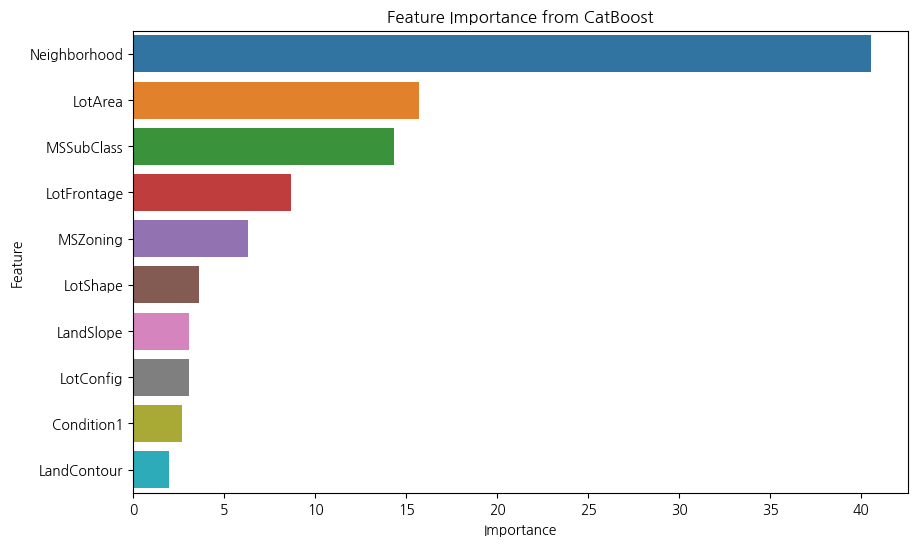

In [32]:
importances = model.get_feature_importance(train_pool)

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='tab10')
plt.title('Feature Importance from CatBoost')
plt.show()

In [33]:
pd.set_option('display.max_rows', None)
importance_df

,Feature,Importance
8,Neighborhood,40.553432
1,LotArea,15.693180
2,MSSubClass,14.333575
0,LotFrontage,8.650735
3,MSZoning,6.335978
4,LotShape,3.636597
7,LandSlope,3.078860
6,LotConfig,3.066964
9,Condition1,2.696492
5,LandContour,1.954187


CatBoost 모델을 통해 피쳐 중요도를 확인한 결과 Neighborhood(인접지역), LotArea(대지 면적),  MSSubClass(판매된 주택의 유형),       
LotFrontage(도로와 연결된 주택의 전면 길이), MSZoning(용도구역) 등의 순으로 나타났으며        
나머지 피쳐들의 중요도는 상대적으로 떨어지는 것으로 나타남.      

(CatBoost 방식 기준으로 Box-Cox 변환을 수행하고 난 전후를 비교했을 때,     
 피쳐 중요도 Top5 목록은 동일하나 피쳐 중요도에서 LotFrontage가 4순위로 하락함. 정규화로 인해 수치형 value간의 차이가 줄어들었기 때문인 것으로 보임)   

더불어 MSZoning(용도구역)의 중요도가 Box-Cox 변환 이후 상승함

In [35]:
# cross-validation 실행 및 결과

from catboost import cv

cv_result = cv(pool = train_pool, params = {'loss_function':'RMSE'}, logging_level = 'Verbose', fold_count=5, iterations = 1000, plot="True")

best_iteration = cv_result['test-RMSE-mean'].idxmin()  # RMSE가 가장 낮은 iteration 선택
print(f"최적 iteration: {best_iteration}")
print(f"최적 Test RMSE: {cv_result.loc[best_iteration, 'test-RMSE-mean']}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.9781090	test: 1.0121742	best: 1.0121742 (0)	total: 19.8ms	remaining: 19.8s
1:	learn: 0.9641513	test: 0.9968229	best: 0.9968229 (1)	total: 34ms	remaining: 17s
2:	learn: 0.9511561	test: 0.9835593	best: 0.9835593 (2)	total: 43.8ms	remaining: 14.6s
3:	learn: 0.9371922	test: 0.9688050	best: 0.9688050 (3)	total: 59ms	remaining: 14.7s
4:	learn: 0.9250878	test: 0.9570412	best: 0.9570412 (4)	total: 74ms	remaining: 14.7s
5:	learn: 0.9122906	test: 0.9442301	best: 0.9442301 (5)	total: 89.8ms	remaining: 14.9s
6:	learn: 0.9016017	test: 0.9331754	best: 0.9331754 (6)	total: 109ms	remaining: 15.5s
7:	learn: 0.8900385	test: 0.9213794	best: 0.9213794 (7)	total: 127ms	remaining: 15.8s
8:	learn: 0.8791842	test: 0.9102338	best: 0.9102338 (8)	total: 144ms	remaining: 15.9s
9:	learn: 0.8689365	test: 0.8998967	best: 0.8998967 (9)	total: 162ms	remaining: 16s
10:	learn: 0.8581645	test: 0.8894476	best: 0.8894476 (10)	total: 178ms	remaining: 16s
11:	learn: 0.8482557	test: 0.879629

결과적으로 중요도 기준 상위 5개 피쳐를 모델에 먼저 활용하고자 함.  
-  Neighborhood(인접지역), LotArea(대지 면적),  MSSubClass(판매된 주택의 유형), LotFrontage(도로와 연결된 주택의 전면 길이), MSZoning(용도구역)